# DIOに基づく基本周波数推定
M. Morise, H. Kawahara and T. Nishiura, ``Rapid F0 Estimation for High-SNR Speech Based on Fundamental Component Extraction,'' Trans. IEICE, vol. J93-D, no. 2, pp. 109-117, Feb. 2010.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyworld
from scipy.io import wavfile

In [2]:
IN_WAVE_FILE = "in.wav"
FRAME_LENGTH = 1024  # フレーム長 (FFTサイズ)
HOP_LENGTH = 80  # フレームのシフト長

In [3]:
# 音声のロード
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

In [4]:
# DIO に基づく基本周波数推定
fo, _ = pyworld.dio(data, fs)

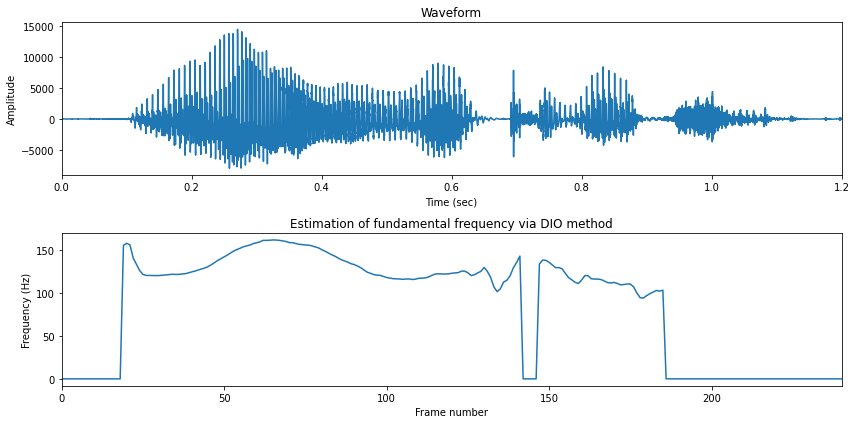

In [5]:
# 波形表示
fig = plt.figure(figsize=(12, 6))
n_samples = len(data)
time = np.arange(n_samples) / fs
axes = fig.add_subplot(2, 1, 1)
axes.plot(time, data)
axes.set_xlabel("Time (sec)")
axes.set_ylabel("Amplitude")
axes.set_title("Waveform")
axes.set_xlim(0, np.max(time))

axes = fig.add_subplot(2, 1, 2)
axes.plot(fo)
axes.set_xlabel("Frame number")
axes.set_ylabel("Frequency (Hz)")
axes.set_title("Estimation of fundamental frequency via DIO method")
axes.set_xlim(0, len(fo) - 1)

plt.tight_layout()
plt.show()